In [131]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression as Linear
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import Imputer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from scipy import stats
from bs4 import BeautifulSoup
import urllib
import sys
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import matplotlib.patches as patches
import requests 
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

sns.set_palette("Blues_d")


In [132]:
df = pd.read_excel('Census_2/2_Clean_Data/Crime_Census_Merged_Imputed_No_Dummies.xlsx')

In [133]:
df.msa_id[df.msa_id== 31080] = 31100 
df['All families - Percent below poverty level; Families'][df['All families - Percent below poverty level; Families']< 0] = 0 
df['Employed; EDUCATIONAL ATTAINMENT - Population 25 to 64 years'][df['Employed; EDUCATIONAL ATTAINMENT - Population 25 to 64 years']< 0] = 0 
df['Total; Median earnings (dollars)'][df['Total; Median earnings (dollars)']< 0] = 0 


In [134]:
print(df.shape)
df.head()

(3669, 324)


,msa_name,msa_name.1,msa_name.2,msa_id,msa_id.1,year,year.1,tot_pop,All families - Percent below poverty level; Families,All families - Total; Families,...,Widowed; Population 15 years and over,rep_violent_crime,rep_murder,rep_rape,rep_robbery,rep_agg_assault,rep_pro_crime,rep_burglary,rep_theft,rep_veh_theft
0,"Abilene, TX","Abilene, TX","Abilene, TX",10180.0,10180.0,2016.0,2016.0,169885.0,10.900000,38610.0,...,5.5,614.0,11.0,79.0,137.0,387.0,4932.0,1104.0,530.0,298.0
1,"Abilene, TX","Abilene, TX","Abilene, TX",10180.0,10180.0,2015.0,2015.0,169713.0,9.900000,37669.0,...,6.6,700.0,9.0,95.0,133.0,463.0,6125.0,1446.0,232.0,447.0
2,"Abilene, TX","Abilene, TX","Abilene, TX",10180.0,10180.0,2014.0,2014.0,169202.0,12.700000,41437.0,...,5.4,677.0,10.0,113.0,140.0,414.0,6207.0,1428.0,372.0,407.0
3,"Abilene, TX","Abilene, TX","Abilene, TX",10180.0,10180.0,2013.0,2013.0,168117.0,11.500000,39532.0,...,5.6,560.0,1.0,43.0,128.0,388.0,5522.0,1323.0,907.0,292.0
4,"Abilene, TX","Abilene, TX","Abilene, TX",10180.0,10180.0,2012.0,2012.0,168908.0,11.236424,39268.0,...,6.8,555.0,3.0,45.0,136.0,371.0,5080.0,1245.0,631.0,204.0


In [135]:
df_small = df[df['msa_id'].isin(df.loc[df['tot_pop'] > 3000000, 'msa_id'])]
df_small[['tot_pop', 'msa_name', 'msa_id', 'year']].head()


,tot_pop,msa_name,msa_id,year
168,5790619.0,"Atlanta-Sandy Springs-Roswell, GA",12060.0,2016.0
169,5704839.0,"Atlanta-Sandy Springs-Roswell, GA",12060.0,2015.0
170,5597635.0,"Atlanta-Sandy Springs-Roswell, GA",12060.0,2014.0
171,5511212.0,"Atlanta-Sandy Springs-Roswell, GA",12060.0,2013.0
172,5434540.0,"Atlanta-Sandy Springs-Marietta, GA",12060.0,2012.0


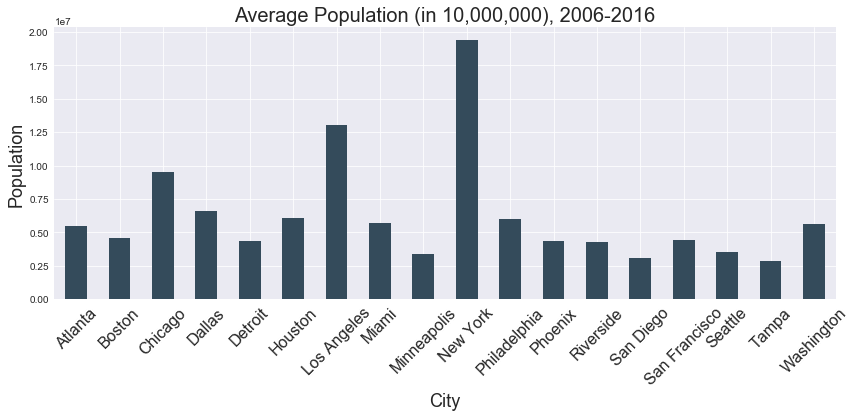

In [136]:
labels = ['Atlanta-Sandy Springs-Marietta', 'Boston-Cambridge-Newton', 'Chicago-Naperville-Elgin', 'Dallas-Fort Worth-Arlington', 'Detroit-Warren-Livonia','Houston-Sugar Land-Baytown','Los Angeles-Long Beach-Anaheim','Miami-Fort Lauderdale-Miami Beach','Minneapolis-St. Paul-Bloomington','New York-Newark-Jersey City','Philadelphia-Camden-Wilmington','Phoenix-Mesa-Scottsdale','Riverside-San Bernardino-Ontario','San Diego-Carlsbad-San Marcos','San Francisco-Oakland-Fremont','Seattle-Tacoma-Bellevue','Tampa-St. Petersburg-Clearwater','Washington-Arlington-Alexandria']
labels_alt = ['Atlanta', 'Boston', 'Chicago', 'Dallas', 'Detroit','Houston','Los Angeles','Miami','Minneapolis','New York','Philadelphia','Phoenix','Riverside','San Diego','San Francisco','Seattle','Tampa','Washington']

fig, ax = plt.subplots(figsize=(16,8), facecolor='w', edgecolor='k', sharey=False)

population = df_small.groupby("msa_id")["tot_pop"].mean()
population.sort_index().plot(kind = 'bar', figsize=(14,5), ax=ax)
plt.xlabel("City", fontsize=18)
plt.ylabel("Population", fontsize=18)
ax.set_title("Average Population (in 10,000,000), 2006-2016",size=20)
ax.set_xticklabels(labels_alt, rotation=45, size=16)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)

In [137]:
df_small_2016= df_small[df_small['year'] == 2016]
df_small_2016.shape

(18, 324)

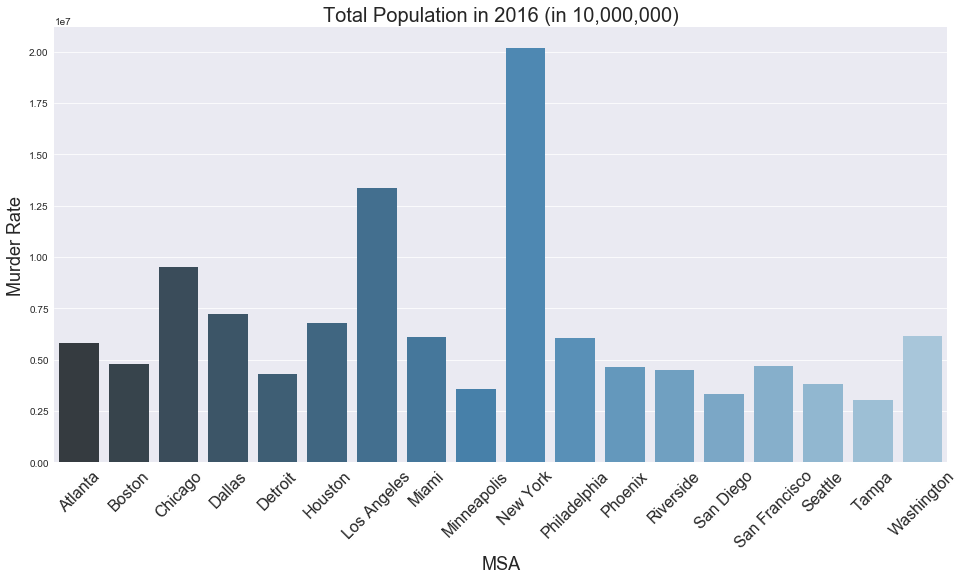

In [138]:

fig, ax = plt.subplots(figsize=(16,8), facecolor='w', edgecolor='k', sharey=False)

sns.barplot(x="msa_id", y="tot_pop", data=df_small_2016, palette="Blues_d", ax=ax).set_title("Total Population in 2016 (in 10,000,000)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, size=12)

plt.xlabel('MSA', fontsize=18)
plt.ylabel('Murder Rate', fontsize=18)

ax.set_title("Total Population in 2016 (in 10,000,000)", fontsize=20)
ax.set_xticklabels(labels_alt, rotation=45, size=16)


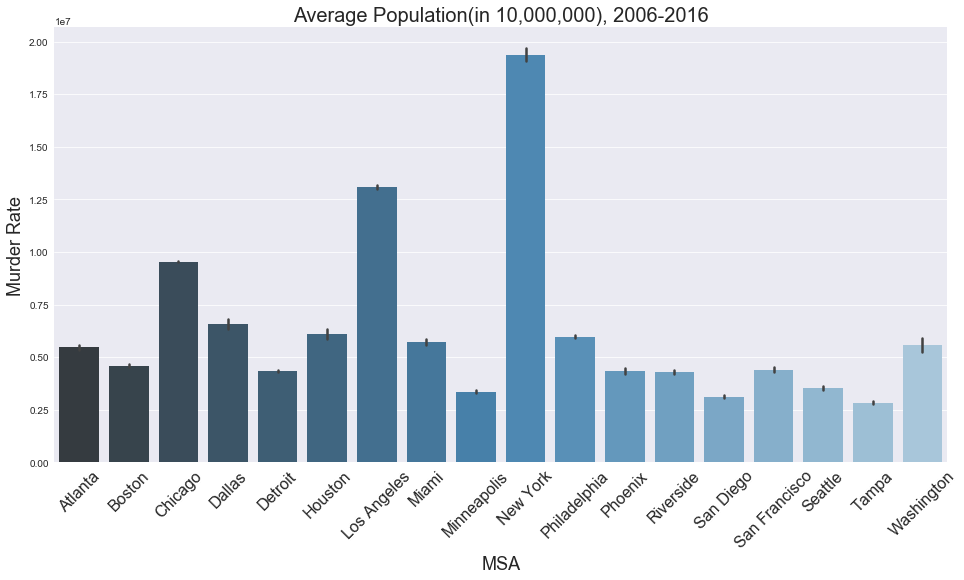

In [139]:
sns.set_context()

fig, ax = plt.subplots(figsize=(16,8), facecolor='w', edgecolor='k', sharey=False)

sns.barplot(x="msa_id", y="tot_pop", data=df_small, palette="Blues_d", ax=ax).set_title("Average Population(in 10,000,000), 2006-2016")
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90, size=12)

plt.xlabel('MSA', fontsize=18)
plt.ylabel('Murder Rate', fontsize=18)
ax.set_title("Average Population(in 10,000,000), 2006-2016", fontsize=20)

labels = ['Atlanta-Sandy Springs-Marietta', 'Boston-Cambridge-Newton', 'Chicago-Naperville-Elgin', 'Dallas-Fort Worth-Arlington', 'Detroit-Warren-Livonia','Houston-Sugar Land-Baytown','Los Angeles-Long Beach-Anaheim','Miami-Fort Lauderdale-Miami Beach','Minneapolis-St. Paul-Bloomington','New York-Newark-Jersey City','Philadelphia-Camden-Wilmington','Phoenix-Mesa-Scottsdale','Riverside-San Bernardino-Ontario','San Diego-Carlsbad-San Marcos','San Francisco-Oakland-Fremont','Seattle-Tacoma-Bellevue','Tampa-St. Petersburg-Clearwater','Washington-Arlington-Alexandria']
ax.set_xticklabels(labels_alt, rotation=45, size=16)


In [140]:
df["violent_crime_rate"] = (df["rep_violent_crime"]/df["tot_pop"])*100000
df["murder_rate"] = (df["rep_murder"]/df["tot_pop"])*100000
df["rape_rate"] = (df["rep_rape"]/df["tot_pop"])*100000
df["robbery_rate"] = (df["rep_robbery"]/df["tot_pop"])*100000
df["agg_assault_rate"] = (df["rep_agg_assault"]/df["tot_pop"])*100000

df_small["violent_crime_rate"] = (df_small["rep_violent_crime"]/df_small["tot_pop"])*100000
df_small["murder_rate"] = (df_small["rep_murder"]/df_small["tot_pop"])*100000
df_small["rape_rate"] = (df_small["rep_rape"]/df_small["tot_pop"])*100000
df_small["robbery_rate"] = (df_small["rep_robbery"]/df_small["tot_pop"])*100000
df_small["agg_assault_rate"] = (df_small["rep_agg_assault"]/df_small["tot_pop"])*100000

df_small_2016["violent_crime_rate"] = (df_small_2016["rep_violent_crime"]/df_small_2016["tot_pop"])*100000
df_small_2016["murder_rate"] = (df_small_2016["rep_murder"]/df_small_2016["tot_pop"])*100000
df_small_2016["rape_rate"] = (df_small_2016["rep_rape"]/df_small_2016["tot_pop"])*100000
df_small_2016["robbery_rate"] = (df_small_2016["rep_robbery"]/df_small_2016["tot_pop"])*100000
df_small_2016["agg_assault_rate"] = (df_small_2016["rep_agg_assault"]/df_small_2016["tot_pop"])*100000


In [157]:
df['high_murder'] = np.where(df['murder_rate']>=10, 1, 0)
df_small['high_murder'] = np.where(df_small['murder_rate']>=10, 1, 0)
df_small_2016['high_murder'] = np.where(df_small_2016['murder_rate']>=10, 1, 0)


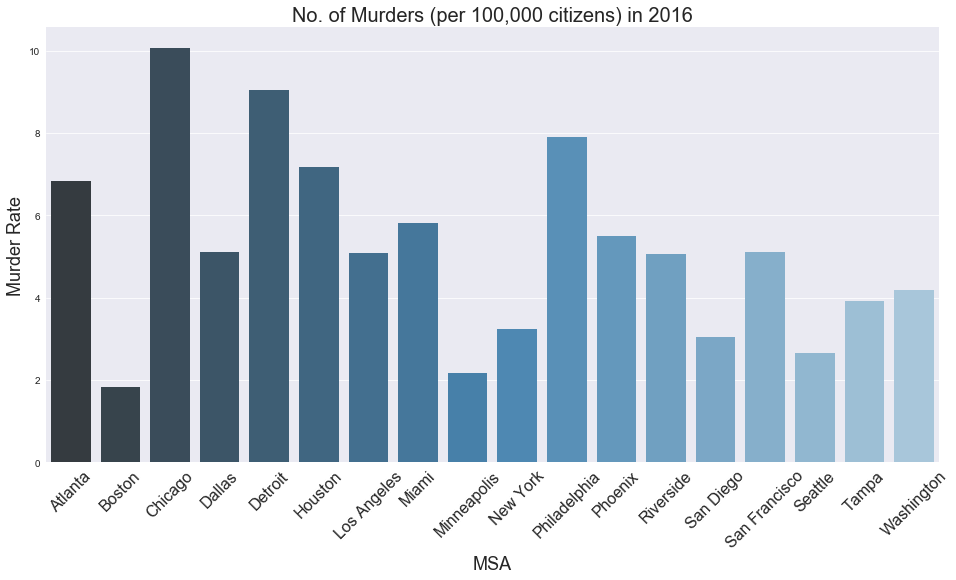

In [141]:
fig, ax = plt.subplots(figsize=(16,8), facecolor='w', edgecolor='k')

sns.barplot(x="msa_id", y="murder_rate", data=df_small_2016, palette="Blues_d", ax=ax).set_title("No. of Murders (per 100,000 citizens) in 2016")

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, size=12)
plt.xlabel('MSA', fontsize=18)
plt.ylabel('Murder Rate', fontsize=18)

ax.set_title("No. of Murders (per 100,000 citizens) in 2016", fontsize=20)

ax.set_xticklabels(labels_alt, rotation=45, size=16)


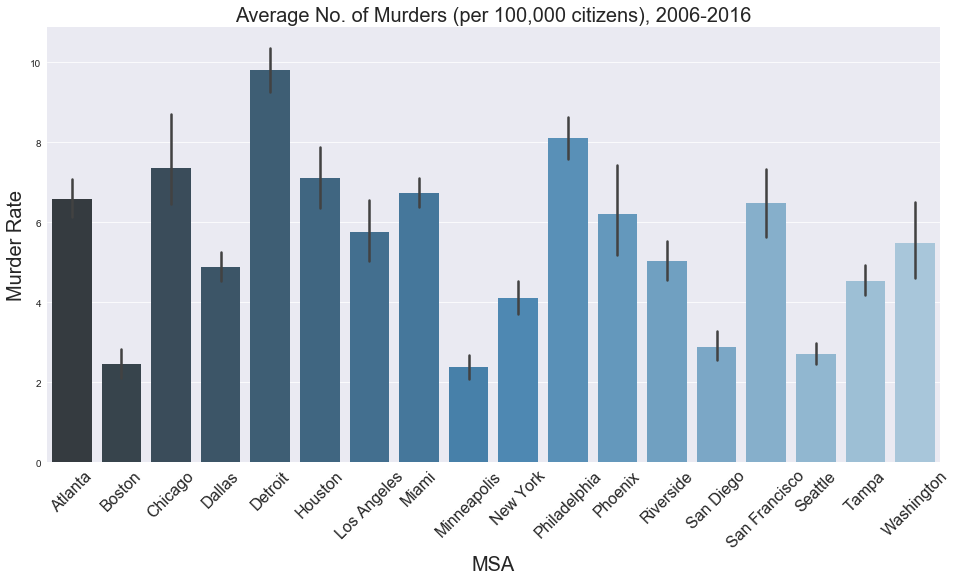

In [142]:
fig, ax = plt.subplots(figsize=(16,8), facecolor='w', edgecolor='k')

sns.barplot(x="msa_id", y="murder_rate", data=df_small, palette="Blues_d", ax=ax).set_title("Average No. of Murders (per 100,000 citizens), 2006-2016")

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, size=12)

plt.xlabel('MSA', size=20)
plt.ylabel('Murder Rate', size=20)

ax.set_title("Average No. of Murders (per 100,000 citizens), 2006-2016", fontsize=20)

ax.set_xticklabels(labels_alt, rotation=45, size=16)


In [143]:
df_red = df_small[['violent_crime_rate','murder_rate','rape_rate','robbery_rate','agg_assault_rate']]
print(df_red.shape)

df_red = df_red.dropna(axis=0, how='any')
print(df_red.shape)


(179, 5)
(166, 5)


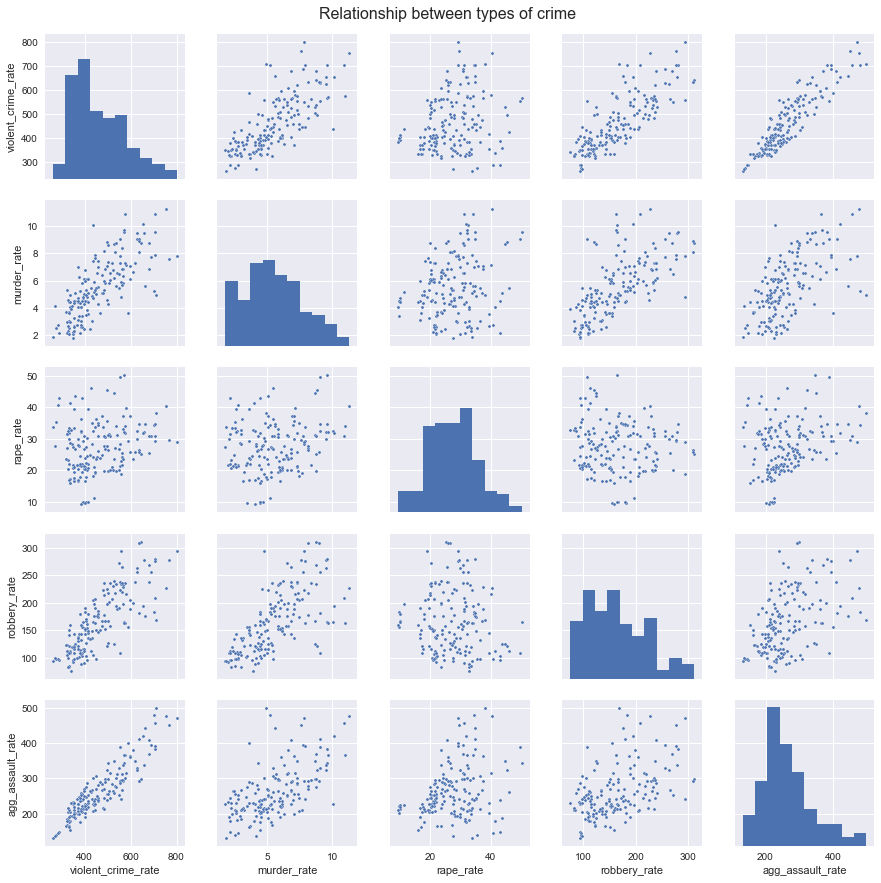

In [144]:
sns.set()
p = sns.pairplot(df_red, plot_kws={"s": 10})
plt.subplots_adjust(top=0.95)
plt.suptitle('Relationship between types of crime', fontsize=16)
#plt.rcParams["axes.labelsize"] = 0.1

In [145]:
def qqplot(x, y, **kwargs):
    _, xr = stats.probplot(x, fit=False)
    _, yr = stats.probplot(y, fit=False)
    plt.scatter(xr, yr, **kwargs)

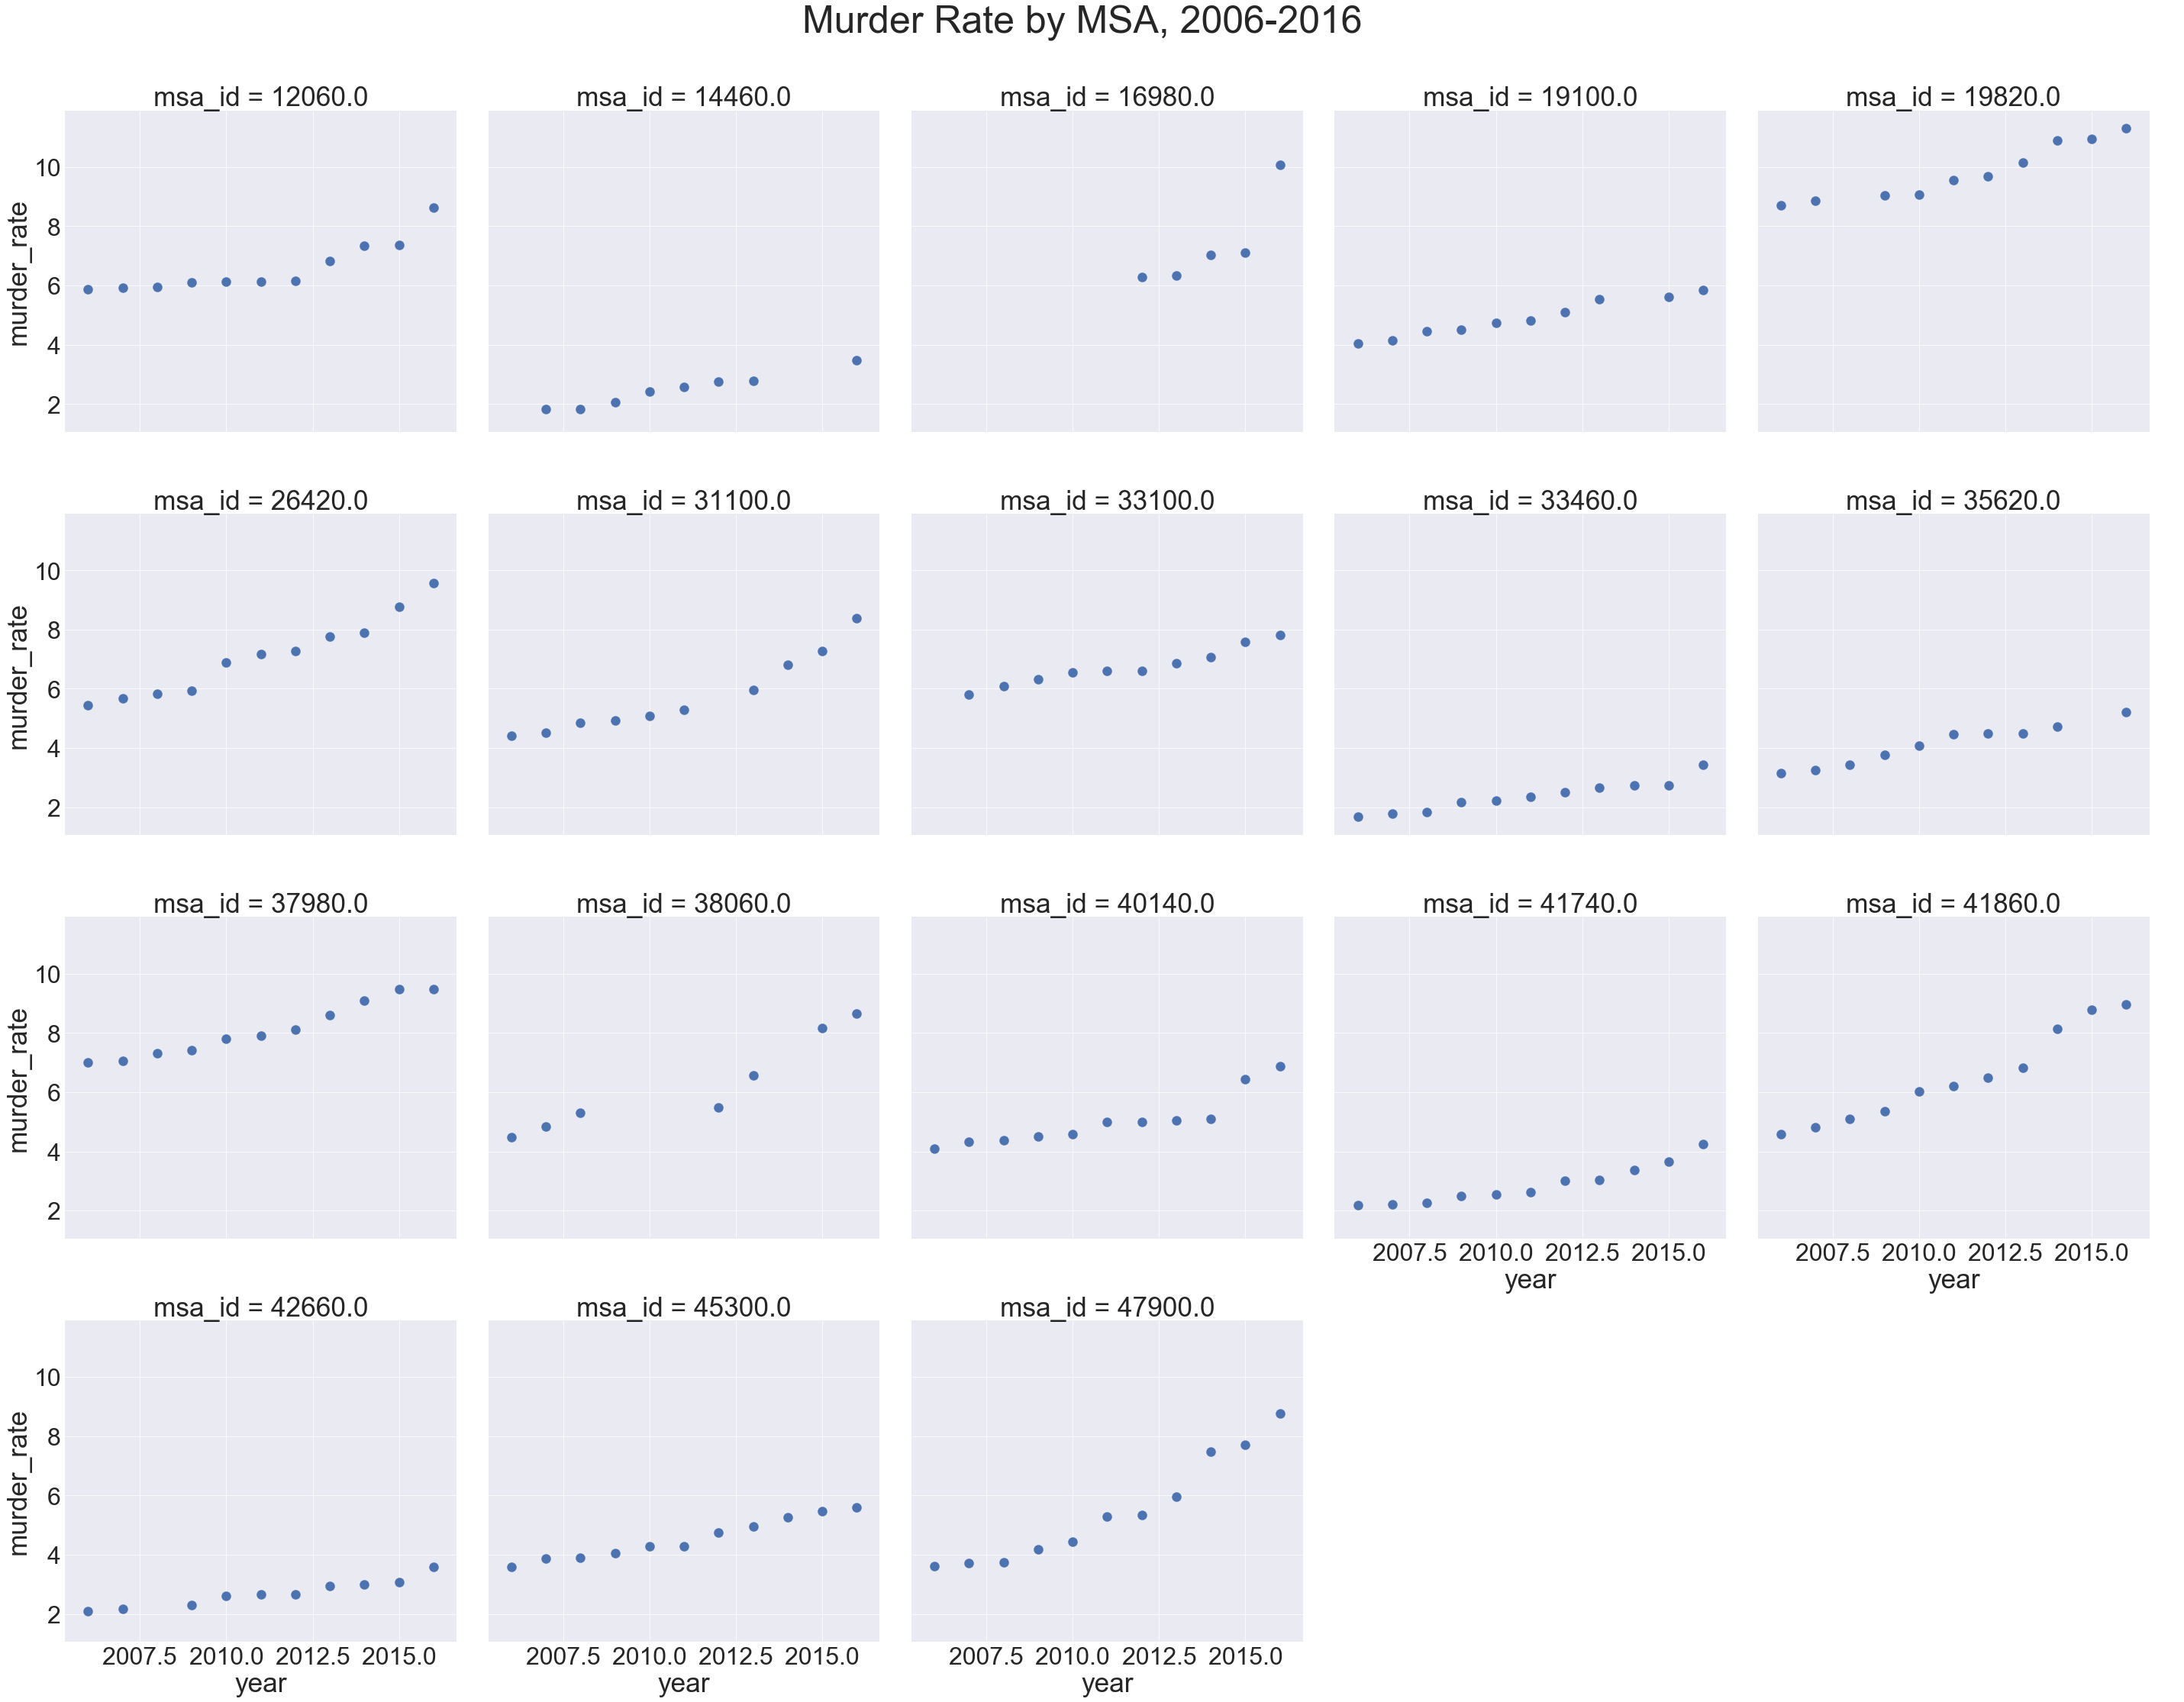

In [146]:
sns.set_context("paper", font_scale=4)                                                  
g = sns.FacetGrid(df_small, col="msa_id", size=8, col_wrap=5)
g.map(qqplot, "year", "murder_rate", s=150)
g.add_legend();
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Murder Rate by MSA, 2006-2016', fontsize=50)


In [147]:
df['per_capita_income']=df['Mean income (dollars); per capita income Total population']
df['poverty_rate']=df['All families - Percent below poverty level; Families']
df['receives_foodstamp']=df['Households receiving food stamps; Households']
df['unemployment_rate']=df['Unemployment rate; Population 20 to 64 years']
df['median_earnings']=df['Total; Median earnings (dollars)']

df_small['per_capita_income']=df_small['Mean income (dollars); per capita income Total population']
df_small['poverty_rate']=df_small['All families - Percent below poverty level; Families']
df_small['receives_foodstamp']=df_small['Households receiving food stamps; Households']
df_small['unemployment_rate']=df_small['Unemployment rate; Population 20 to 64 years']
df_small['median_earnings']=df_small['Total; Median earnings (dollars)']



(1000, 50000)

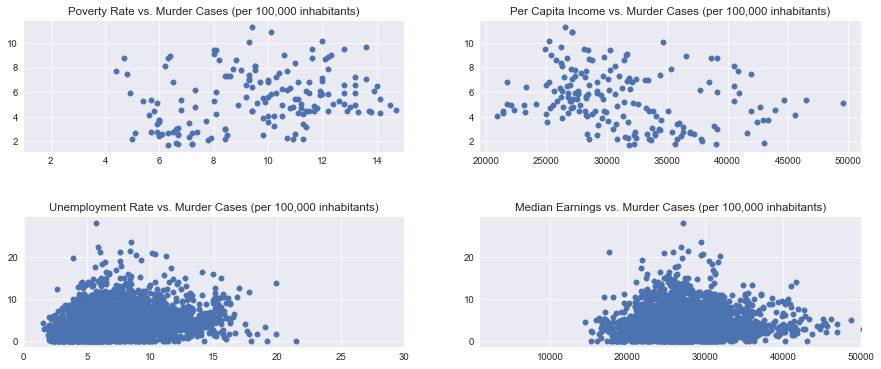

In [149]:

sns.set_context("paper", font_scale=1.2)                                                  

fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2, figsize = (15, 6), facecolor = 'w', edgecolor = 'k', sharey = False)
ax1.scatter(y = df_small["murder_rate"], x = df_small['poverty_rate'])
ax2.scatter(y = df_small["murder_rate"], x = df_small['per_capita_income'])
ax3.scatter(y = df["murder_rate"], x = df['unemployment_rate'])
ax4.scatter(y = df["murder_rate"], x = df['median_earnings'])

ax1.set_title('Poverty Rate vs. Murder Cases (per 100,000 inhabitants)')
ax2.set_title('Per Capita Income vs. Murder Cases (per 100,000 inhabitants)')
ax3.set_title('Unemployment Rate vs. Murder Cases (per 100,000 inhabitants)')
ax4.set_title('Median Earnings vs. Murder Cases (per 100,000 inhabitants)')

fig.subplots_adjust(hspace = 0.5, wspace=.2)
ax1.set_xlim([1,15]) 
ax3.set_xlim([0,30])
ax4.set_xlim([1000,50000])



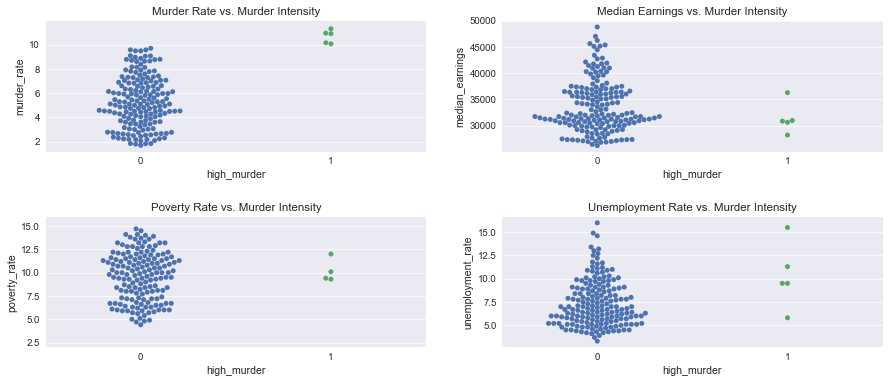

In [181]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2, figsize = (15, 6), facecolor = 'w', edgecolor = 'k', sharey = False)

sns.swarmplot(x="high_murder", y="murder_rate", data=df_small, ax=ax1)
sns.swarmplot(x="high_murder", y="median_earnings", data=df_small, ax=ax2)
sns.swarmplot(x="high_murder", y="poverty_rate", data=df_small, ax=ax3)
sns.swarmplot(x="high_murder", y="unemployment_rate", data=df_small, ax=ax4);

ax1.set_title('Murder Rate vs. Murder Intensity')
ax3.set_title('Poverty Rate vs. Murder Intensity')
ax4.set_title('Unemployment Rate vs. Murder Intensity')
ax2.set_title('Median Earnings vs. Murder Intensity')

ax3.set_ylim([2,16])
fig.subplots_adjust(hspace = 0.5, wspace=.2)
